## Titanic Solution ....an approach from a beginner's mindset

 - Titanic competition is a beginners dataset to join the Data Scientist community
 - This is perfect dataset to practice Logistic regression or Binary Classficiation algorithm
 - In the solution below we will simply focus on cleaning the data and quickly building the model 
 - No complex code or strategies are used in this notebook 
 - The problem is solved with simple libraries which a beginner learns during his early days of Data Science education
 
*An expert Data Sceintist will always tell you that it's always important to model a problem in early stages and tune from thereafter so lets dive in*


**PS : The below solution had a score of 0.76 on the kaggle leaderboard**

<img src="https://cdn.vox-cdn.com/thumbor/Z3M6rKDTsQO3qjwu_a4v-J5rQKg=/0x10:2000x1510/1200x800/filters:focal(0x10:2000x1510)/cdn.vox-cdn.com/uploads/chorus_image/image/46125356/titanicillustration.0.0.jpg" width=500 height=500 />

### Beginner's Steps to Approach a Data Science Problem 

1. [Define the problem](#BS1)
2. [Gather the Data](#BS2)
3. [Analyze the Dataset](#BS3) 
4. [Visualize the Dataset](#BS4)
5. [Prepare/Clean the Data](#BS5)
6. [Select an approach of model and Decide a Performance metric](#BS6)
7. [Present your solution](#BS7)

<a id='BS1'></a>
### 1. Define the problem

 - The problem at hand is to predict whether a passenger survived the Titanic disaster or not.
 - The Survival of a passenger is represented by Survival Column in the train data where 0 = No and 1 = yes
 - Test data doesn't contain this column , which we will predict based upon the model created on the train data
 - If you are unfamiliar with the Titanic accident read [here](https://www.history.com/topics/early-20th-century-us/titanic)

In [1]:
# Data Dictionary
# Variable	Definition	Key
# survival	Survival	0 = No, 1 = Yes
# pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
# sex	Sex	
# Age	Age in years	
# sibsp	# of siblings / spouses aboard the Titanic	
# parch	# of parents / children aboard the Titanic	
# ticket	Ticket number	
# fare	Passenger fare	
# cabin	Cabin number	
# embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton
# Variable Notes
# pclass: A proxy for socio-economic status (SES)
# 1st = Upper
# 2nd = Middle
# 3rd = Lower

# age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

# sibsp: The dataset defines family relations in this way...
# Sibling = brother, sister, stepbrother, stepsister
# Spouse = husband, wife (mistresses and fiancés were ignored)

# parch: The dataset defines family relations in this way...
# Parent = mother, father
# Child = daughter, son, stepdaughter, stepson
# Some children travelled only with a nanny, therefore parch=0 for them.

In [1]:
# Importing the usual libraries and filter warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pyplot import xticks
import warnings
warnings.filterwarnings('ignore')
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

<a id='BS2'></a>
### 2. Gather the Data

 - This step is easy while working with the Kaggle problems , data is already gathered and available in excel sheets
 - Real life Data Science problems will however require you to collect data from various sources  (Databases/DataWarehouses/etc.)

In [2]:

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

#train = pd.read_csv('/kaggle/input/titanic/test.csv')
#test = pd.read_csv('/kaggle/input/titanic/train.csv')

print(train.shape,test.shape)
#In the beginning it's important to check the size of your train and test data which later helps in 
#deciding the sample size while testing your model on train data

(891, 12) (418, 11)


<a id='BS3'></a>
### 3. Analyze the Dataset

 - A beginner's approach should be to first check the null values in the dataset,  use the isnull() function
 - Check the datatype of the variables , use the info() function
 - Use the describe() function to see the min max values / mean and standard deviation of the variables. Once you move to the next level you will realize the importance of checking these features
 - Lastly take a look at the data to get a feel of values in the dataset . By doing a head() of the dataset you will realize that column name will hardly affect the target variable "Survived" . Gender will although be intresting to see whether more women survided than men . Seeing expert solutions you will realize how people even engineered the name variable but we will skip for now from a novice perspective.

In [3]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


<a id='BS4'></a>

### 4. Visualize the Data

 - Step 3 and 4(Analyze and Visualize) go hand in hand
 - It takes some practice to know which visualization graphs to use and draw correct inferences
 - Try to answer your curious questions for starters like 
     1. How many people survived and how many didn't
     2. Who survived the most male or female
     3. Is there any relationship between people who payed higher fare and survival rate
 - Mainly you would like to see the relationship between target class and input vairables 

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

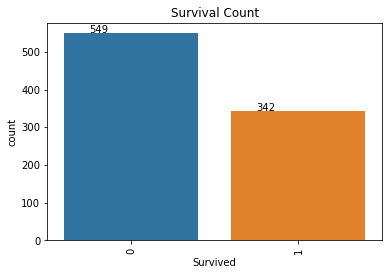

In [12]:
# To see the survival count
ax = sns.countplot("Survived",data=train)
ax.set_title("Survival Count")
for p in ax.patches:
     ax.annotate(p.get_height(), (p.get_x()+0.15, p.get_height()+1))
xticks(rotation=90)
#Looks like the Target variable is not skewed

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

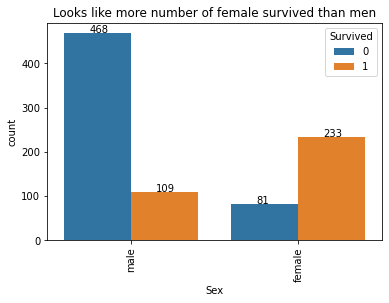

In [13]:
# To see the survival count among male and female
ax = sns.countplot("Sex",data=train,hue="Survived")
ax.set_title("Looks like more number of female survived than men")
for p in ax.patches:
     ax.annotate(p.get_height(), (p.get_x()+0.15, p.get_height()+1))
xticks(rotation=90)

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

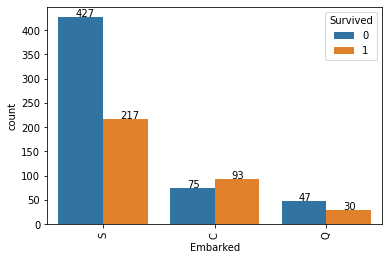

In [15]:
#Interesting to see how people emabarked for Southamptom suffered the most casualties
ax = sns.countplot("Embarked",data=train,hue="Survived")
for p in ax.patches:
     ax.annotate(p.get_height(), (p.get_x()+0.15, p.get_height()+1))
xticks(rotation=90)
#Looks like the passengers with Pclass=3 surviced the most

<a id='BS5'></a>
### 5. Prepare/Clean the Data
 - This stage reuires a lot of practice of various datasets for a Data Scientist to know what should be done, we will take the simplest approaches of the text book
 - In this stage we would like to fill in the missing values
 - Try to find outliers , values which are unexpected maybe you would not expect people's age to be negative or fare to be way too high to be true
 - Here i used a simple approach of using guessing people's age by Pclass and gender and replacing them with the average age in that section
 - In this stage its better to combine the train and test dataset minus the target variable and pre process it 

In [4]:
ntrain = train.shape[0]
y = train['Survived'].values
df = pd.concat([train.drop(columns=['Survived']), test])
df.shape

(1309, 11)

In [5]:
df.isnull().sum()

PassengerId       0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [6]:
df.groupby(['Pclass','Sex']).mean()

PassengerId        Age     SibSp     Parch        Fare
Pclass Sex                                                           
1      female   689.652778  37.037594  0.555556  0.472222  109.412385
       male     658.687151  41.029272  0.340782  0.279330   69.888385
2      female   632.188679  27.499223  0.500000  0.650943   23.234827
       male     695.976608  30.815380  0.327485  0.192982   19.904946
3      female   628.393519  22.185329  0.791667  0.731481   15.324250
       male     645.888438  25.962264  0.470588  0.255578   12.415462

In [23]:
#The above Avg Age by PClass gives a very unique distinction 
#The people who survived in 1st Class were elderlies near 35-43Age group , those in lower classes were young ,
#which could also mean kids survived 

In [7]:
df.loc[(df["Pclass"]==1) & (df["Sex"]=="female") & (df["Age"].isnull()),'Age'] = 37.0
df.loc[(df["Pclass"]==1) & (df["Sex"]=="male") & (df["Age"].isnull()),'Age'] = 41.0

df.loc[(df["Pclass"]==2) & (df["Sex"]=="female") & (df["Age"].isnull()),'Age'] = 27.0
df.loc[(df["Pclass"]==2) & (df["Sex"]=="male") & (df["Age"].isnull()),'Age'] = 30.0

df.loc[(df["Pclass"]==3) & (df["Sex"]=="female") & (df["Age"].isnull()),'Age'] = 22.0
df.loc[(df["Pclass"]==3) & (df["Sex"]=="male") & (df["Age"].isnull()),'Age'] = 25.0

In [9]:
df.isnull().sum()

PassengerId       0
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [19]:
# Since most of the population onboard was embarked for Southampton and 
#just 2 rows were missing Embarked value so we would fill it with S
df["Embarked"].fillna("S",inplace=True)

In [10]:
# One value of fare is missing
df[df["Fare"].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [16]:
#Lets see whats the average value of fare by a passenger from Pclass = 3 and above the age of 40
df[(df["Pclass"]==3) & (df.Age > 40) & (df.Sex == "male")].mean()

PassengerId    552.305556
Pclass           3.000000
Age             48.402778
SibSp            0.083333
Parch            0.111111
Fare             8.508334
dtype: float64

In [17]:
#Fill the missing value with the average
df.loc[(df["Pclass"]==3) & (df.Fare.isnull()) & (df.Sex == "male"), 'Fare'] = 8.5

In [20]:
df.isnull().sum()

PassengerId       0
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          0
dtype: int64

In [21]:
# Since almost a thousand people are missing Cabin its best we drop this column as we couldn't see any corelation between the 
# value of Cabin and Survived at this stage
df.drop(columns = ["Cabin"],inplace=True)

In [37]:
#df.dropna(inplace=True)

In [31]:
# Looks like we have dealt with all the missing values quickly 
# Later we could explore multiple other pro techniqies to deal with missing values but at this stage
# we are looking for a quick model solution
df.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [32]:
#We feel its better to drop these columns , maybe we could refer to some pro's notebooks to how use them in the model later
df_prep = df.drop(columns=['PassengerId','Name','Ticket'])

In [33]:
df_prep.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [34]:
df_prep.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 7 columns):
Pclass      1309 non-null int64
Sex         1309 non-null object
Age         1309 non-null float64
SibSp       1309 non-null int64
Parch       1309 non-null int64
Fare        1309 non-null float64
Embarked    1309 non-null object
dtypes: float64(2), int64(3), object(2)
memory usage: 121.8+ KB


In [35]:
df_prep['Parch'] = df_prep['Parch'].apply(str)
df_prep['SibSp'] = df_prep['SibSp'].apply(str)
df_prep['Pclass'] = df_prep['Pclass'].apply(str)

In [36]:
# Categorical values need to be converted into numbers and one such simple approach is one hot encoding
OneHot = pd.get_dummies(df_prep[['Pclass','Sex','SibSp','Parch','Embarked']])

In [37]:
OneHot.head()

,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,...,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Parch_9,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,1,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [38]:
df_prep =  df_prep.drop(columns=['Pclass','Sex','SibSp','Parch','Embarked'])
df_prep = pd.concat([df_prep,OneHot],axis=1)
df_prep.shape

(1309, 25)

In [39]:
#Once we have cleaned the data we will divide it back again into its orignal format of train and test
df_train = df_prep[:ntrain]
df_test = df_prep[ntrain:]

In [49]:
df_train.head()

,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,SibSp_2,...,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Parch_9,Embarked_C,Embarked_Q,Embarked_S
0,22.0,7.2500,0,0,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,38.0,71.2833,1,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,26.0,7.9250,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,35.0,53.1000,1,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,35.0,8.0500,0,0,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1


<a id='BS6'></a>
### 6. Select an approach of model and Decide a Performance metric
 - Since this is a binary classification problem you can zero in on the set of algorithms you are going to try for the model
 - It is very important at this stage to decide first on the performance metric before starting the model apply process
 - Decision on performance metric depends on deep understanding of the business 
 - In the words of Andrew Ng you need to first decide your target and then make you team aim at it
 - For Binary classification you can choose between Precision/Recall/F1 score/Accuracy , etc 
 - For the sake of Kaggle competition we will choose Accuracy as a performance metric and try to improve our Accuracy of prediction

In [40]:
# Loading 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [41]:
seed = 2
test_size = 0.2

X_train, X_test, y_train, y_test = train_test_split(df_train,y, test_size = test_size , random_state = seed)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(712, 25) (179, 25) (712,) (179,)


In [42]:
# Logistic Regression

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [43]:
accuracy = accuracy_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
roc_auc = roc_auc_score(y_test,y_pred)
cv_score = cross_val_score(model,X_train,y_train,cv=7,scoring="accuracy")
cv_predict = cross_val_predict(model,X_train,y_train,cv=7)
print('Accuracy: %f' % accuracy)
print('Precision: %f' % precision)
print('Recall: %f' % recall)
print('F1 score: %f' % f1)
print('ROC AUC score: %f' % roc_auc)
print("Accuracy by cross val score : %0.2f (+/- %0.2f)" % (cv_score.mean(), cv_score.std() * 2))
print("Accuracy by cross val predict : %0.2f" % (accuracy_score(y_train,cv_predict)))

Accuracy: 0.798883
Precision: 0.841270
Recall: 0.670886
F1 score: 0.746479
ROC AUC score: 0.785443
Accuracy by cross val score : 0.82 (+/- 0.04)
Accuracy by cross val predict : 0.82


In [44]:
confusion_matrix(y_test,y_pred)

array([[90, 10],
       [26, 53]], dtype=int64)

In [45]:
confusion_matrix(y_train,cv_predict)


array([[393,  56],
       [ 75, 188]], dtype=int64)

In [49]:
# Lets try some hyperparameter tuning with Grid search
params = {'C':[0.01,0.1,1,10],
           'penalty':['l1','l2']}
grid_search = GridSearchCV(model,params,cv=10,scoring='accuracy',return_train_score=True)
grid_search.fit(df_train,y)
grid_search.best_params_

{'C': 10, 'penalty': 'l2'}

In [50]:
model = LogisticRegression(C=10,penalty='l2')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
roc_auc = roc_auc_score(y_test,y_pred)
cv_score = cross_val_score(model,X_train,y_train,cv=7,scoring="accuracy")
cv_predict = cross_val_predict(model,X_train,y_train,cv=7)
print('Accuracy: %f' % accuracy)
print('Precision: %f' % precision)
print('Recall: %f' % recall)
print('F1 score: %f' % f1)
print('ROC AUC score: %f' % roc_auc)
print("Accuracy by cross val score : %0.2f (+/- %0.2f)" % (cv_score.mean(), cv_score.std() * 2))
print("Accuracy by cross val predict : %0.2f" % (accuracy_score(y_train,cv_predict)))

Accuracy: 0.798883
Precision: 0.841270
Recall: 0.670886
F1 score: 0.746479
ROC AUC score: 0.785443
Accuracy by cross val score : 0.82 (+/- 0.04)
Accuracy by cross val predict : 0.82


<a id='BS7'></a>

### 7. Present your solution

 - At this point we have achived a Accuracy score of 79% with a precision of 84% which is not bad for a beginner
 - You are free to try other algorithms like Support Vector Machine / K Nearest Neighbours / Naive Bayes Agorithm 
 - This approach doesn't rank you high on the leaderboard but hey now the real game begins
 - We are to revisit our Data Cleaning  approach ,try ensembling , try high level classification algorithms to improve our score on the leaderboard

In [60]:
#Here is the code to make your submission
#test["Survived"] = model.predict(df_test)
#submission = test[['PassengerId','Survived']].copy()
#submission.to_csv("Titanic_kaggle.csv",index=False)
#Upload the file Titanic_kaggle.csv to the submission